<a href="https://colab.research.google.com/github/geo-yrao/ML4ES-tutorials/blob/master/NCICS_ML_lecture_09_INCOMPLETE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NCICS ML Lesson 09: introduction to support vector machines and support vector regression

Welcome to Lesson 9 of the North Carolina Institute for Climate Studies' Machine Learning Course. In this session, we'll examine how to use support vector machines for regression problems.  We'll be using a new data set; this set is derived from the US Climate Reference Network.

## About the data set:

Check the USCRN_Daily_Data_readme.txt file in the repository for a complete description of this dataset.

# Preprocess the data

We will be using a new data set from the US Climate Reference Network's Asheville station. Let's load and preprocess it.

In [ ]:
# Import all of the libraries that we'll be using.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

# Import additional modules, objects, and functions that we'll use.
from datetime import datetime
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Define the path and names of our data files.
path_data_dir =\
  "./ML4ES-tutorials/00-Data/USCRN-data/"
filename_data = "USCRN-NC_Asheville_8_SSW_2001-2019.csv"

# Clone the data from the GitHub repo and then check which files are present.
try:
    ! git clone https://github.com/geo-yrao/ML4ES-tutorials.git
    ! ls $path_data_dir
except:
    ! ls $path_data_dir

fatal: destination path 'ML4ES-tutorials' already exists and is not an empty directory.
README.md  USCRN_Daily_Data_readme.txt	USCRN-NC_Asheville_8_SSW_2001-2019.csv


## Ingest the data 

We will ingest the data and keep the following fields as our features: T_DAILY_AVG, P_DAILY_CALC, SOLARAD_DAILY, SUR_TEMP_DAILY_AVG, RH_DAILY_AVG.

We will be using the 20 cm soil depth as our regression target for this case. Note that I've left the 5 cm and 10 cm depths commented out. You can play with using those depths instead (we chose to start with 20 cm because it had the most available data).

In [ ]:
# Use pandas's read_csv() function to import the data. Stipulate that the first
# column as the dataframe's index.
df = pd.read_csv(path_data_dir+filename_data, index_col="LST_DATE")

# Subset to columns-of-interest and use dates as dataframe index.
cols_to_keep_data = [
    "T_DAILY_AVG", "P_DAILY_CALC", "SOLARAD_DAILY",
    "SUR_TEMP_DAILY_AVG", "RH_DAILY_AVG"
]
cols_to_keep_soil_moisture = [
    # "SOIL_MOISTURE_5_DAILY",
    # "SOIL_MOISTURE_10_DAILY",
    "SOIL_MOISTURE_20_DAILY"
]
df_data = df[cols_to_keep]
df_soil_moisture = df[cols_to_keep_soil_moisture]

# Get rid of rows with NaN values.
df_data = df_data.dropna()
df_soil_moisture = df_soil_moisture.loc[df_data.index]

df_soil_moisture = df_soil_moisture.dropna()
df_data = df_data.loc[df_soil_moisture.index]

# Reindex the dataframe using the dates converted into datetime objects.
dates_list = [datetime.strptime(str(d),'%Y%m%d') for d in df_data.index]
df_data.index = dates_list
df_soil_moisture.index = dates_list

## Explore USCRN Asheville station data

We will explore the USCRN soil moisture data by plotting the features and target. We will then calculate the correlation values between both features and the soil moisture targets. These correlations will give us an idea of which features may hold more information regarding concurrent soil moisture values.

In [1]:
# Make a quick plot of all the features to gain some understanding as to their characteristics.


In [2]:
# Combine the feature and target dataframes so as to easily calculate their
# correlation coefficients.

# Calculate the correlations matrix between the variables.

# Plot the correlation matrix.


# Leave-One-Out Cross Validation

Spoiler alert: the 20 cm soil moisture is a difficult target for which to build a regressor.  Because of this, I chose to simply plot the test years' moisture values and the support vector regressor's prediction for that year. 

Here, because of the temporal nature of the data, we're introducing the concept of leave-one-out cross validation.  The idea is to prevent any data leak from the training set to the test set by temporally separating them as best as possible. We'll explore this concept more in upcoming notebooks.

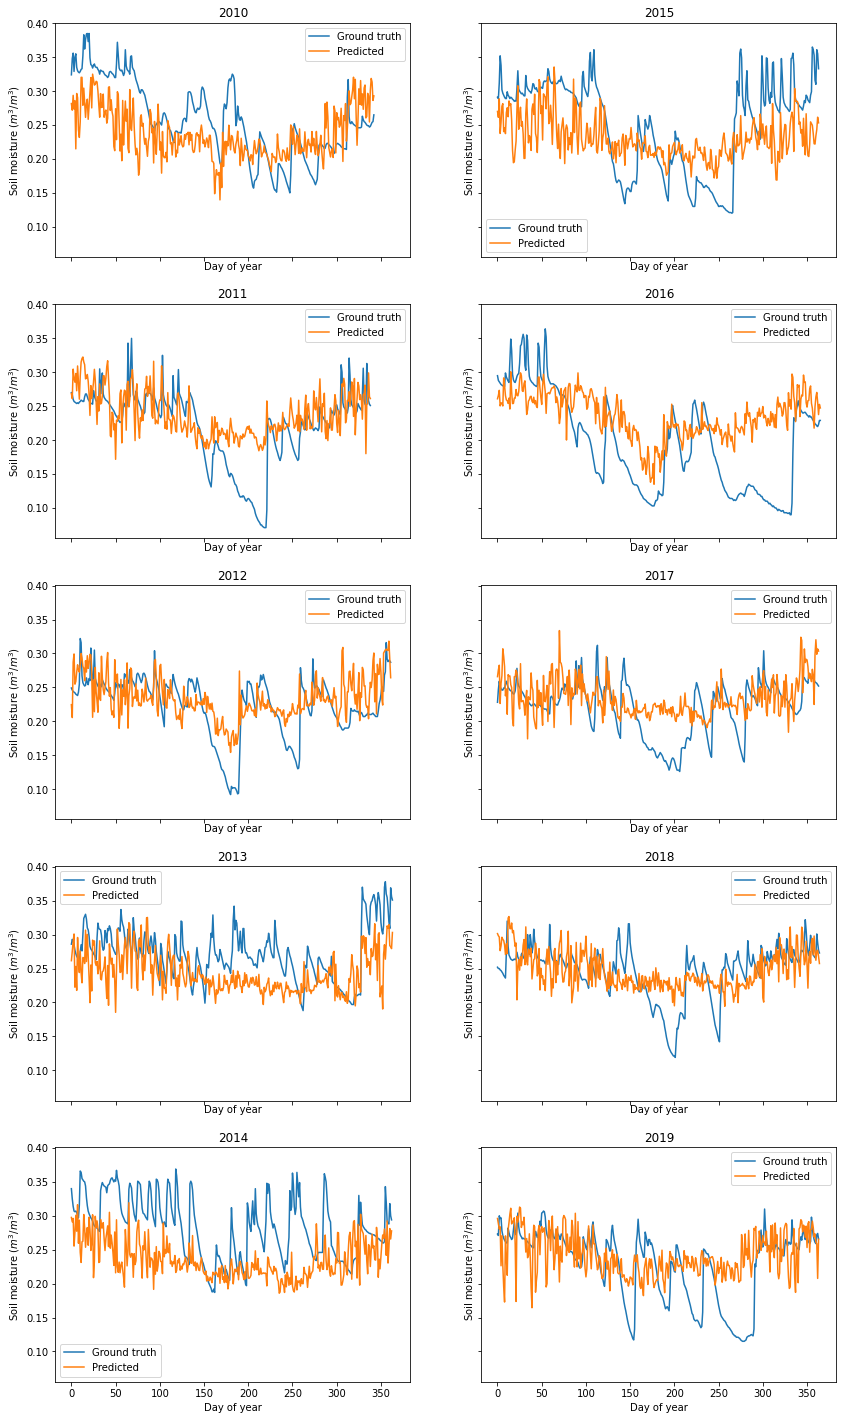

In [ ]:
# Make a list of unique years.

# Define a training year and then split the data into training and testing.
# year = unique_years_list[0]
fig, ax = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(14, 25))
for idx, year in enumerate(unique_years_list):
    train_idxs_list = [False if y==year else True for y in years_list]
    test_idxs_list = [True if y==year else False for y in years_list]

    # Make an sklearn.pipeline object that includes a standard scaler (SVMs don't do 
    # well unless their data are scaled) and a support vector regressor.

    # Train the regressor.

    # Plot the actual soil moisture and predicted soil moisture of the test year.
    x = [i for i in range(len(y_test))]
    i = idx % 5
    j = idx // 5
    current_ax = ax[i, j]
